In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as grp
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import folium

import warnings
warnings.filterwarnings('ignore')


In [45]:
df= pd.read_csv('M20_P9_Covid10_USA.csv')
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [47]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [48]:
df.shape

(58, 18)

In [49]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


Here we can see numeric description which show us correlation among all columns also we can see positive and negative correlation which give us idea which attribute is more suitable for our model and data

In [50]:
df['Province_State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [51]:
df.Province_State.value_counts().sort_index()

Alabama                     1
Alaska                      1
American Samoa              1
Arizona                     1
Arkansas                    1
California                  1
Colorado                    1
Connecticut                 1
Delaware                    1
Diamond Princess            1
District of Columbia        1
Florida                     1
Georgia                     1
Grand Princess              1
Guam                        1
Hawaii                      1
Idaho                       1
Illinois                    1
Indiana                     1
Iowa                        1
Kansas                      1
Kentucky                    1
Louisiana                   1
Maine                       1
Maryland                    1
Massachusetts               1
Michigan                    1
Minnesota                   1
Mississippi                 1
Missouri                    1
Montana                     1
Nebraska                    1
Nevada                      1
New Hampsh

In [52]:
df.tail(8)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
50,Utah,US,2020-05-21 02:32:54,40.1500,-111.8624,7710,90,4423.0,3197.0,49,240.489738,179664.0,631.0,1.167315,84000049,USA,5604.065930,8.184176
51,Vermont,US,2020-05-21 02:32:54,44.0459,-72.7107,944,54,824.0,66.0,50,151.284718,25058.0,NaN,5.720339,84000050,USA,4015.775919,NaN
52,Virgin Islands,US,2020-05-21 02:32:54,18.3358,-64.8963,69,6,61.0,2.0,78,64.324869,1383.0,NaN,8.695652,850,VIR,1289.294104,NaN
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text major ticklabel objects>)

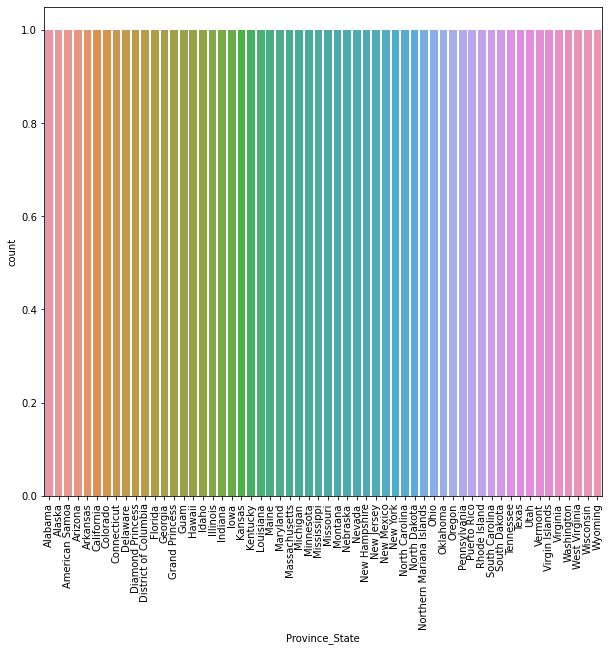

In [53]:
plt.figure(figsize=(10,9))
sns.countplot(df.Province_State)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 <a list of 58 Text major ticklabel objects>)

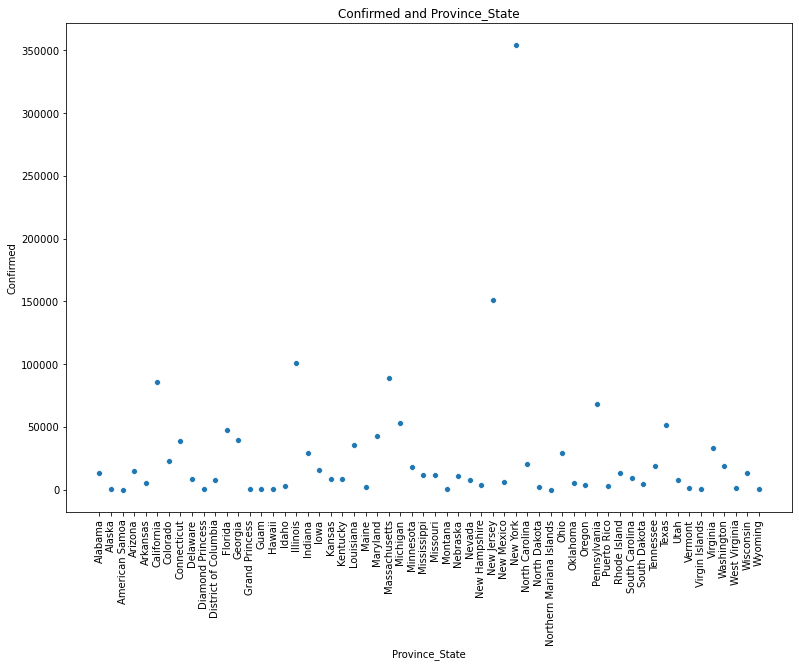

In [54]:
plt.figure(figsize=(13,9))
plt.xlabel('Province_State')
plt.ylabel('Confirmed')
plt.title('Confirmed and Province_State')
sns.scatterplot(x='Province_State',y='Confirmed',data=df)
plt.xticks(rotation=90)

Here we can look for confirmed cases in each Provinces

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 <a list of 58 Text major ticklabel objects>)

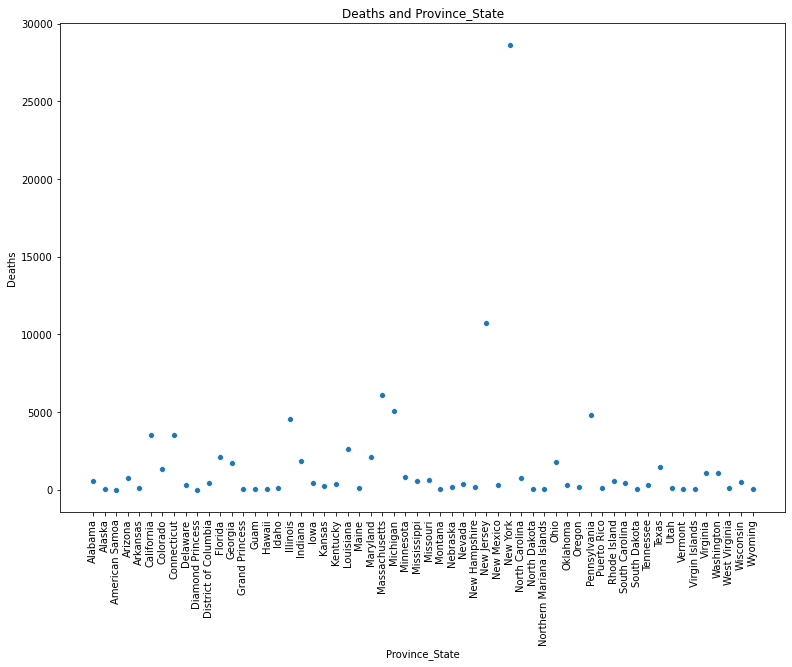

In [55]:
plt.figure(figsize=(13,9))
plt.xlabel('Province_State')
plt.ylabel('Deaths')
plt.title('Deaths and Province_State')
sns.scatterplot(x='Province_State',y='Deaths',data=df)
plt.xticks(rotation=90)

here we can compaire death rate of each provinces

In [56]:
Hospitalization_Rate_pivot = \
df.pivot_table(index="Province_State", values="Hospitalization_Rate", aggfunc=np.median)

In [57]:
Hospitalization_Rate_pivot

,Hospitalization_Rate
Province_State,
Alabama,11.438860
Arizona,12.022005
Arkansas,10.693584
Colorado,17.348774
Connecticut,28.054438
Florida,18.819911
Georgia,17.856335
Hawaii,12.752722
Idaho,8.579409


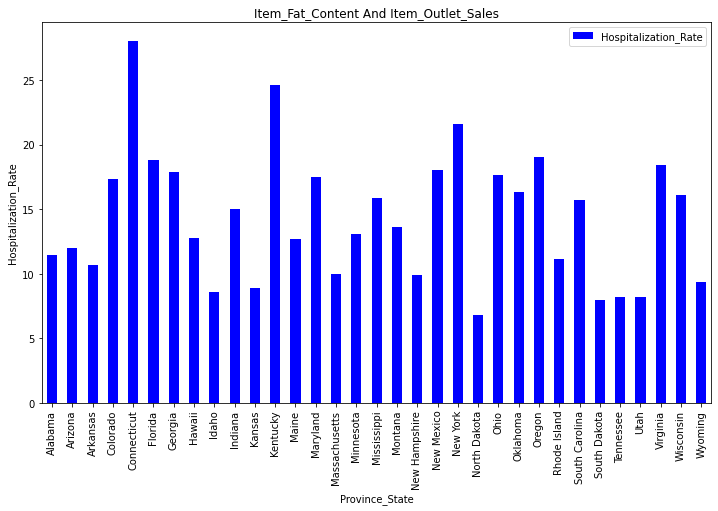

In [58]:
Hospitalization_Rate_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Province_State')
plt.ylabel('Hospitalization_Rate')
plt.title('Item_Fat_Content And Item_Outlet_Sales')
plt.xticks(rotation=90)
plt.show()

Here we can see the Hospitalization rate with respect to their provinces

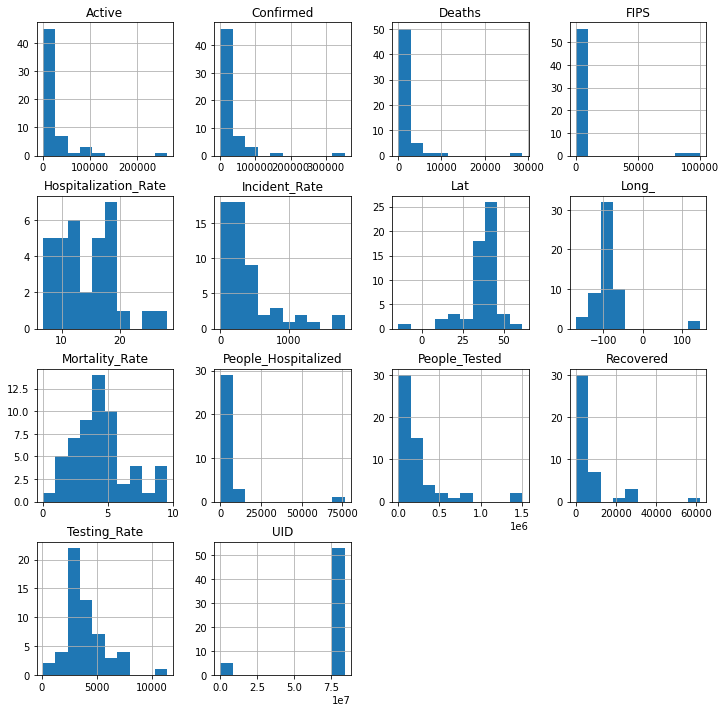

In [59]:
df.hist(figsize=(12,12));

In [60]:
df.skew()

Lat                    -2.213092
Long_                   3.509241
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.136333
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.955650
People_Tested           2.783163
People_Hospitalized     5.290187
Mortality_Rate          0.492052
UID                    -3.027480
Testing_Rate            1.291806
Hospitalization_Rate    0.667943
dtype: float64

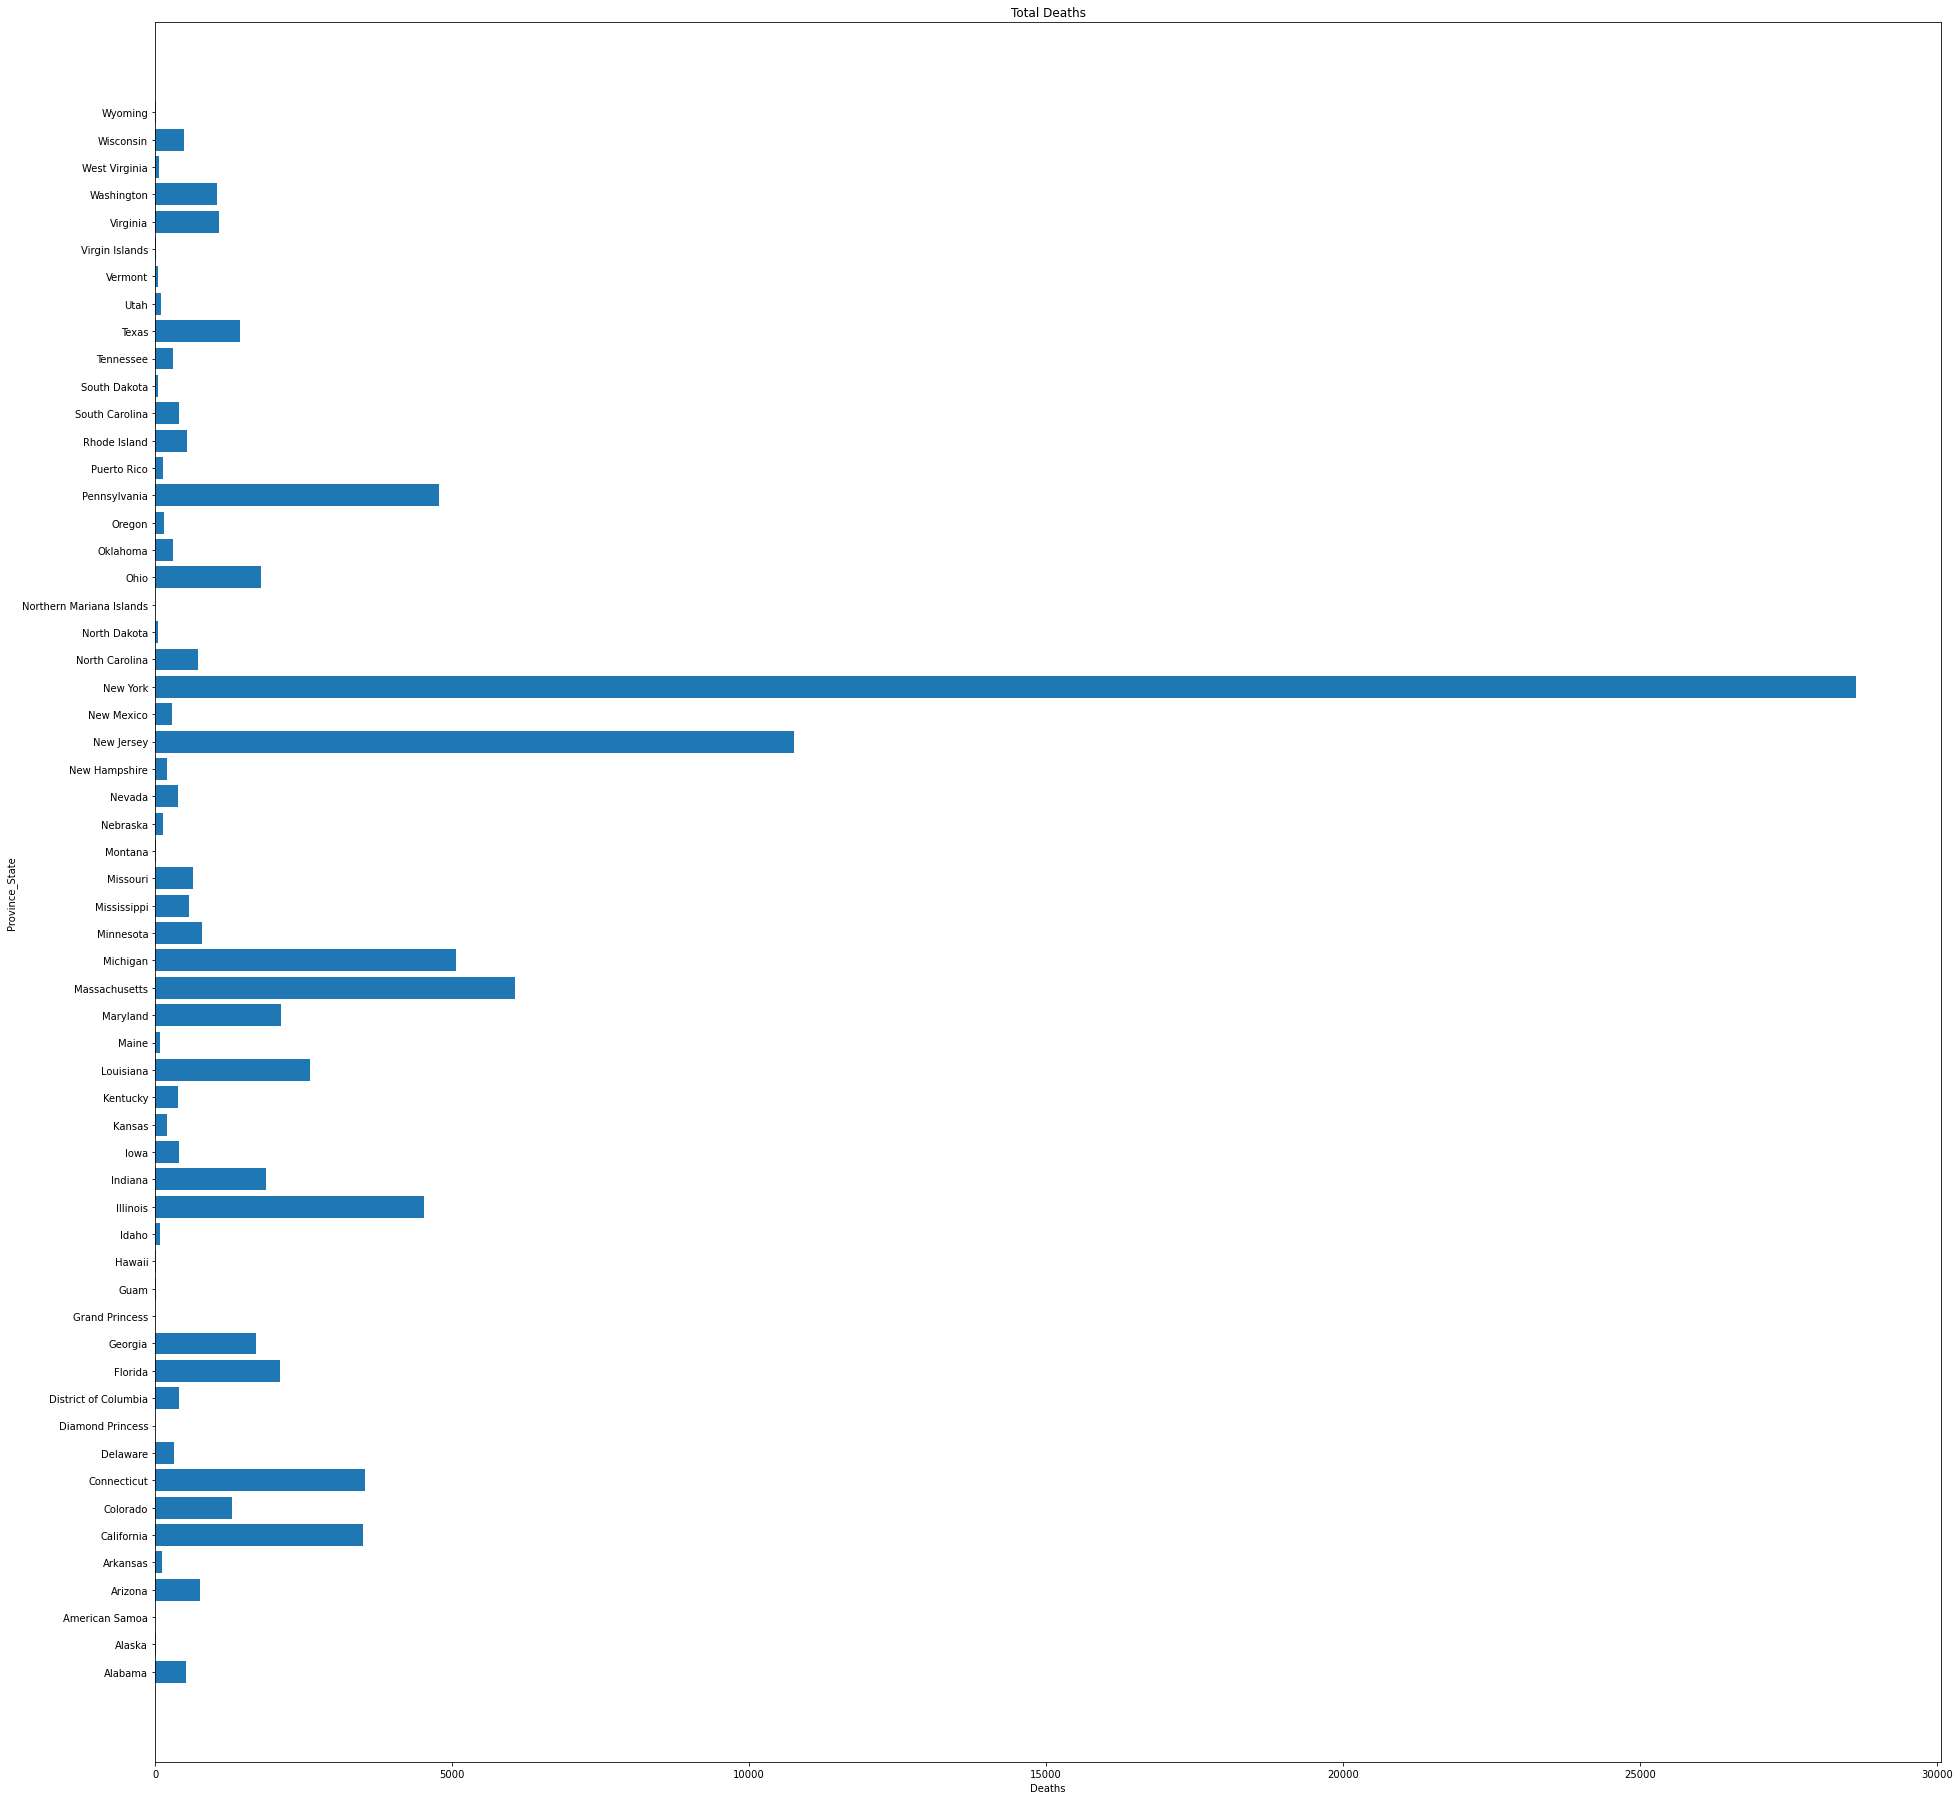

In [61]:
plt.figure(figsize=(32,32))
plt.barh(df['Province_State'],df['Deaths'])
plt.title('Total Deaths')
plt.xlabel('Deaths')
plt.ylabel('Province_State ')
plt.show()

In above graph we can easily see that heighest Numbber of deaths lead by New York and followed by New Jersey

In [62]:
le = LabelEncoder()
df['Province_State'] = le.fit_transform(df.Province_State.values)
df['Country_Region'] = le.fit_transform(df.Country_Region.values)
df['ISO3'] = le.fit_transform(df.ISO3.values)
df['Last_Update'] = le.fit_transform(df.Last_Update.values)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     int32  
 1   Country_Region        58 non-null     int32  
 2   Last_Update           58 non-null     int32  
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 <a list of 18 Text major ticklabel objects>)

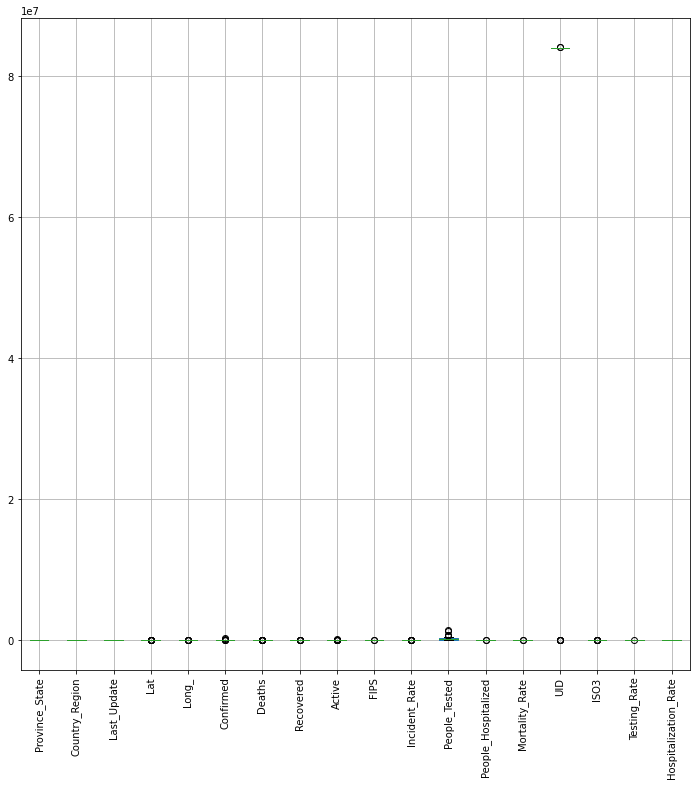

In [64]:
df.boxplot(figsize=(12,12));
plt.xticks(rotation=90)

we can see here there is putlier in UID attribute

In [65]:
df.corr()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,NaN,NaN,0.157083,0.091266,0.006490,0.015229,0.081279,-0.027612,-0.195045,-0.079874,-0.066761,0.007398,0.019524,-0.031331,0.196777,0.084877,-0.178396
Country_Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last_Update,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,0.157083,NaN,NaN,1.000000,-0.278274,0.120959,0.120024,0.043318,0.120148,-0.374943,0.245693,0.084769,0.065030,-0.189675,0.774106,0.725014,0.309579,-0.162856
Long_,0.091266,NaN,NaN,-0.278274,1.000000,0.009998,0.028772,-0.043379,0.011654,0.367911,0.041318,-0.077781,0.280909,0.318569,-0.526908,-0.403983,0.190191,0.251661
Confirmed,0.006490,NaN,NaN,0.120959,0.009998,1.000000,0.982191,0.876856,0.985218,-0.096696,0.711776,0.828022,0.989936,0.383425,0.153972,0.109999,0.334032,0.327376
Deaths,0.015229,NaN,NaN,0.120024,0.028772,0.982191,1.000000,0.856295,0.954378,-0.075053,0.712117,0.741730,0.992313,0.427721,0.120043,0.085588,0.345441,0.325817
Recovered,0.081279,NaN,NaN,0.043318,-0.043379,0.876856,0.856295,1.000000,0.809437,-0.013571,0.592014,0.950785,0.962082,0.362330,0.166898,0.100373,0.252155,0.302197
Active,-0.027612,NaN,NaN,0.120148,0.011654,0.985218,0.954378,0.809437,1.000000,-0.092276,0.703931,0.829687,0.976456,0.368403,0.146354,0.104824,0.322773,0.332398
FIPS,-0.195045,NaN,NaN,-0.374943,0.367911,-0.096696,-0.075053,-0.013571,-0.092276,1.000000,-0.220264,-0.194011,0.013433,-0.262258,0.058022,0.040586,-0.092705,-0.172665


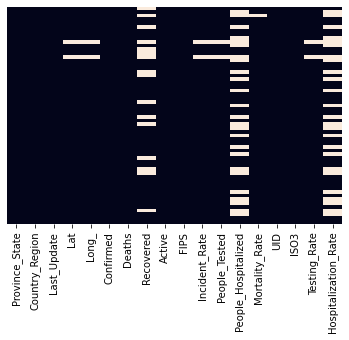

In [66]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Here we can see where are Null data present with the help of heatmap visualisation

In [67]:
for col in ['Lat','Long_']:
     df[col].fillna(df[col].mode(),inplace=True)

In [68]:
date=df[df['Last_Update']==max(df['Last_Update'])]

In [69]:
m = folium.Map(location=[0,0], tiles='cartodbpositron',min_zoom=1,maz_zoom=5,zoom_start=1)
for i in range(0,len(date)):
    folium.Circle(location=[date.iloc[i]['Lat'],date.iloc[i]['Long_']],color='blue',fill = 'blue',
                tooltip='<li><bold> Province:'+str(date.iloc[i]['Province_State'])+
                         '<li><bold> Deaths:'+str(date.iloc[i]['Deaths'])+
                             '<li><bold> Confirmed :'+str(date.iloc[i]['Confirmed']),
                 radius=int(date.iloc[i]['Confirmed'])**0.5).add_to(m)
m    

In [70]:
for column in ['Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']:
    df[column].fillna(df[column].mean(),inplace=True)

In [71]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     int32  
 1   Country_Region        58 non-null     int32  
 2   Last_Update           58 non-null     int32  
 3   Lat                   58 non-null     float64
 4   Long_                 58 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             58 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         58 non-null     float64
 11  People_Tested         58 non-null     float64
 12  People_Hospitalized   58 non-null     float64
 13  Mortality_Rate        58 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [73]:
df.style.background_gradient(cmap='Reds')

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,0,32.318200,-86.902300,13052,522,7007.428571,12530.000000,1,266.194321,164450.000000,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,1,0,0,61.370700,-152.404400,401,10,352.000000,39.000000,2,54.815493,37045.000000,4897.454545,2.493766,84000002,4,5063.940017,14.342541
2,2,0,0,-14.271000,-170.132000,0,0,7007.428571,0.000000,60,0.000000,124.000000,4897.454545,4.458248,16,0,222.857246,14.342541
3,3,0,0,33.729800,-111.431200,14906,747,3773.000000,10386.000000,4,204.788838,165435.000000,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,4,0,0,34.969700,-92.373100,5003,107,3852.000000,1044.000000,5,165.782801,96258.000000,535.000000,2.138717,84000005,4,3189.670370,10.693584
5,5,0,0,36.116200,-119.681600,85997,3497,7007.428571,82500.000000,6,217.646575,1380120.000000,4897.454545,4.066421,84000006,4,3492.893832,14.342541
6,6,0,0,39.059800,-105.311100,22797,1299,3478.000000,18020.000000,8,395.868121,131837.000000,3955.000000,5.698118,84000008,4,2289.339188,17.348774
7,7,0,0,41.597800,-72.755400,39017,3529,6264.000000,29224.000000,9,1094.357902,190718.000000,10946.000000,9.044775,84000009,4,5349.302875,28.054438
8,8,0,0,39.318500,-75.507100,8194,310,3965.000000,3919.000000,10,841.476990,45412.000000,4897.454545,3.783256,84000010,4,4663.552976,14.342541
9,9,0,0,32.318200,-111.431200,49,0,7007.428571,49.000000,88888,396.230806,225853.410714,4897.454545,0.000000,84088888,4,3894.186870,14.342541


in above we can see that maximum number of death recoverd and conferm cases are showed in dark Red where minimum number in light Red and white

In [74]:
df1 = pd.DataFrame(df,columns=['Confirmed','Recovered','Deaths'])
sum_column = df1.sum(axis=0)
print (sum_column)

Confirmed    1.551853e+06
Recovered    4.064309e+05
Deaths       9.343900e+04
dtype: float64


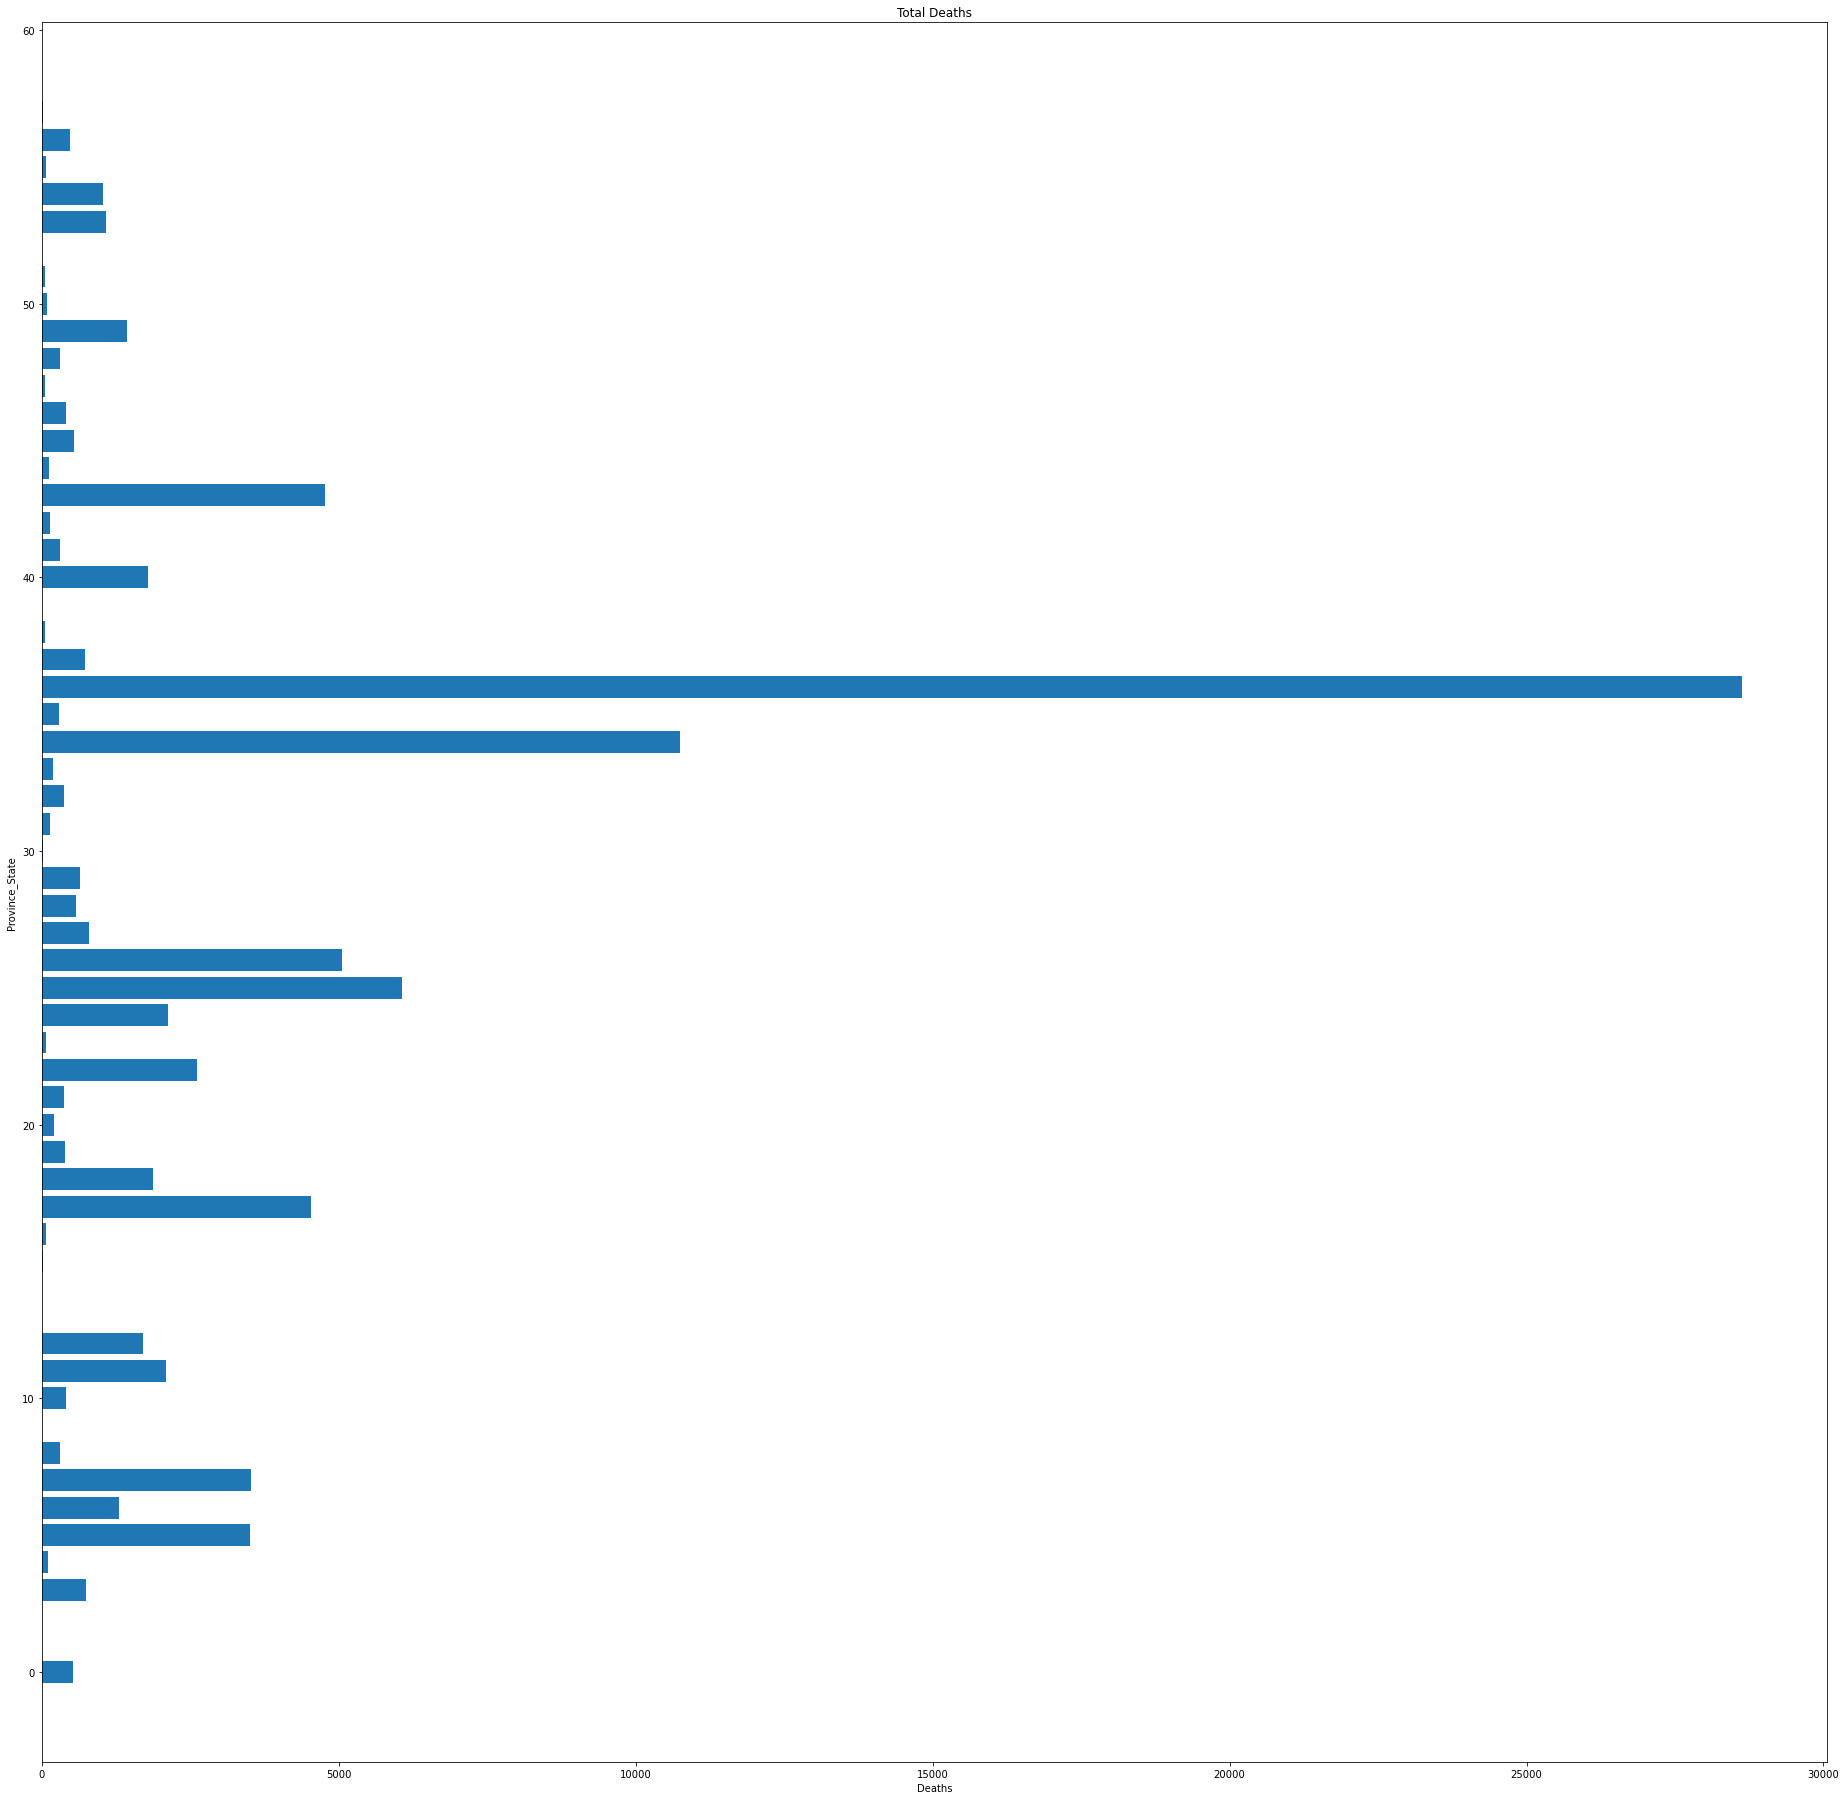

In [75]:
plt.figure(figsize=(32,32))
plt.barh(df['Province_State'],df['Deaths'])
plt.title('Total Deaths')
plt.xlabel('Deaths')
plt.ylabel('Province_State ')
plt.show()

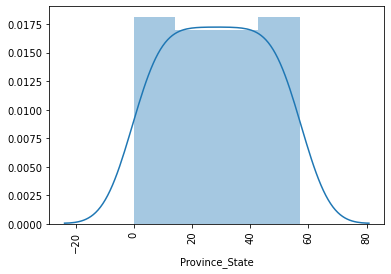

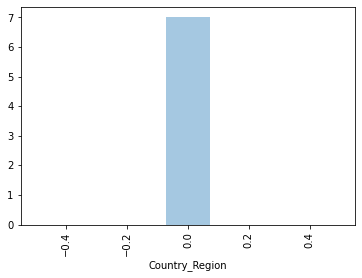

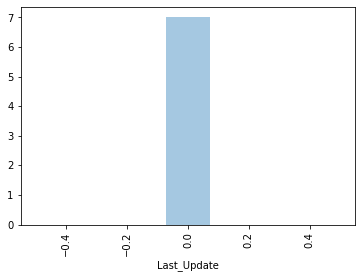

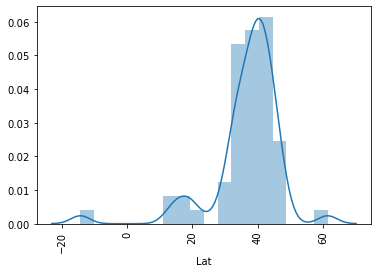

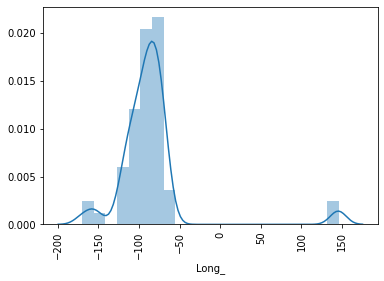

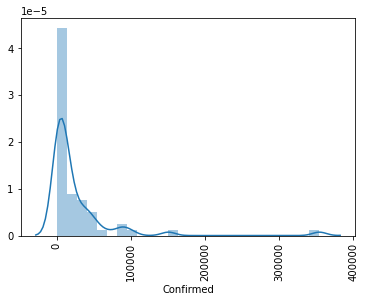

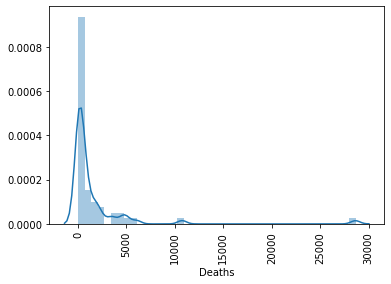

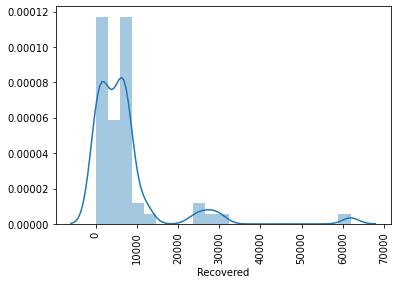

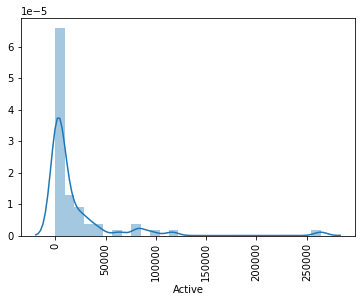

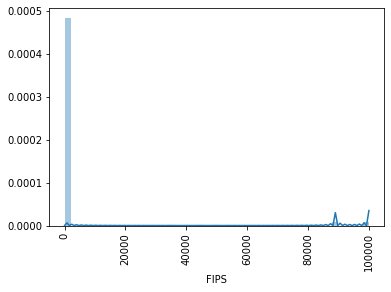

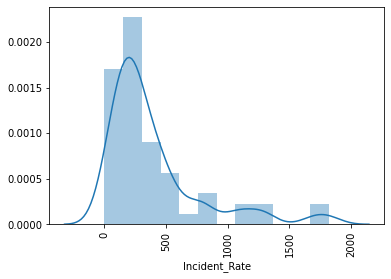

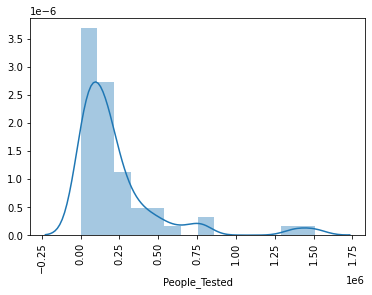

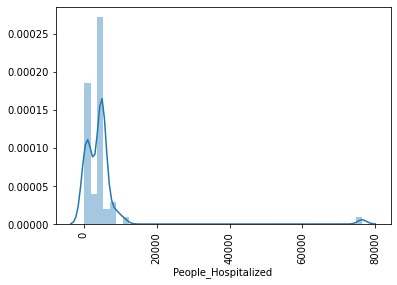

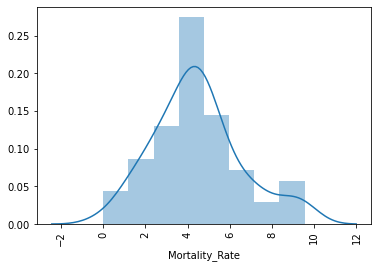

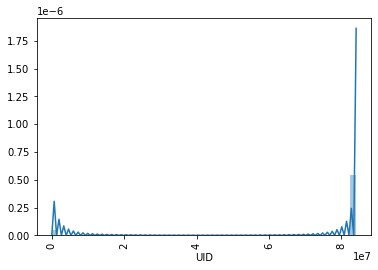

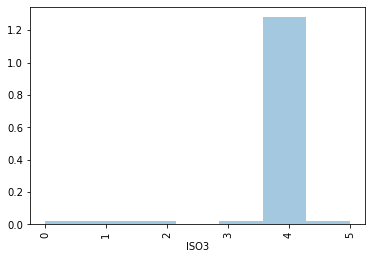

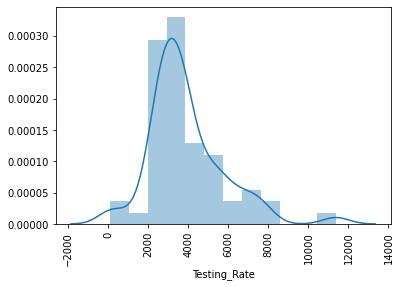

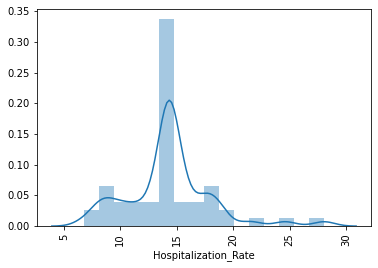

In [76]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

 we plots above graph to see which attributes playing more valueable inputs for our project

In [77]:
x = df.drop('Last_Update', axis=1)
x = df.drop('Lat', axis=1)
x = df.drop('Long_', axis=1)
x = df.drop('Deaths', axis=1)
df['Deaths']= df['Deaths'].astype('category')
y = df['Deaths']

In [78]:
print(x)

    Province_State  Country_Region  Last_Update      Lat     Long_  Confirmed  \
0                0               0            0  32.3182  -86.9023      13052   
1                1               0            0  61.3707 -152.4044        401   
2                2               0            0 -14.2710 -170.1320          0   
3                3               0            0  33.7298 -111.4312      14906   
4                4               0            0  34.9697  -92.3731       5003   
5                5               0            0  36.1162 -119.6816      85997   
6                6               0            0  39.0598 -105.3111      22797   
7                7               0            0  41.5978  -72.7554      39017   
8                8               0            0  39.3185  -75.5071       8194   
9                9               0            0  32.3182 -111.4312         49   
10              10               0            0  38.8974  -77.0268       7551   
11              11          

We use label encodr here for converting string data of country to numbers so we can process data 

In [79]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=0)
df.shape

(58, 18)

We split data here in Training and Testing with test size of 0.30

In [80]:
x_train.shape

(40, 17)

In [81]:
y_train.shape

(40,)

In [82]:
alpha_value={'alpha':[1,.1,.01,.001,.0001,.0]}
model_test= Lasso()
grid=GridSearchCV(estimator=model_test, param_grid=alpha_value)

In [83]:
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.0]})
0.24198100135210118
1
{'alpha': 1}
/n


In [84]:
alpha_value1={'alpha':[1,.1,.01,.001,.0001,0]}
model_test1= Ridge()
grid=GridSearchCV(estimator=model_test1, param_grid=alpha_value1)

In [85]:
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.22321298497492723
0.1
{'alpha': 0.1}
/n


In [86]:
import sklearn
from sklearn.metrics import explained_variance_score,r2_score,mean_tweedie_deviance

import warnings
warnings.filterwarnings('ignore')

model=[LinearRegression(), Lasso(alpha=1),Ridge(alpha=1)]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(' Score = \n',m,'is :')
    print(explained_variance_score(y_test,predm))
    print(r2_score(y_test,predm))
    print(mean_tweedie_deviance(y_test,predm))
    print('\n')

 Score = 
 LinearRegression() is :
0.9199883180799563
0.9195352741407012
485178.94254158635


 Score = 
 Lasso(alpha=1) is :
0.9231925441714318
0.922910858781946
464825.1468974857


 Score = 
 Ridge(alpha=1) is :
0.9526990688083262
0.9526574582874634
285461.78564610187


